In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('train.csv')

In [3]:
df.shape

(404290, 6)

In [4]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [5]:
new_df=df.sample(30000)

In [6]:
new_df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       1
is_duplicate    0
dtype: int64

is_duplicate
0    18871
1    11129
Name: count, dtype: int64
is_duplicate
0    62.903333
1    37.096667
Name: count, dtype: float64


<Axes: xlabel='is_duplicate'>

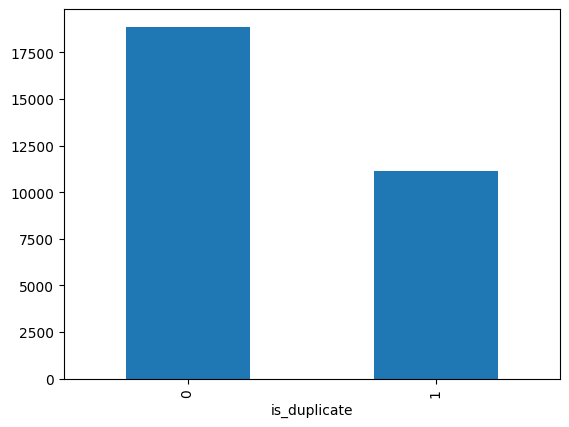

In [7]:
print(new_df['is_duplicate'].value_counts())
print((new_df['is_duplicate'].value_counts()/new_df['is_duplicate'].count())*100)
new_df['is_duplicate'].value_counts().plot(kind='bar')

In [8]:
qid = pd.Series(new_df['qid1'].tolist() + new_df['qid2'].tolist())
print('Number of unique questions',np.unique(qid).shape[0])
x = qid.value_counts()>1
print('Number of questions getting repeated',x[x].shape[0])

Number of unique questions 55326
Number of questions getting repeated 3463


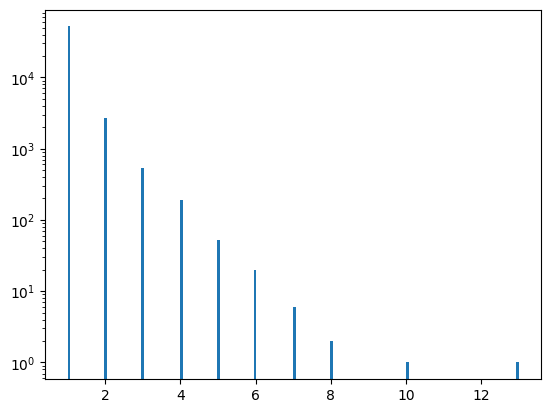

In [9]:
plt.hist(qid.value_counts().values,bins=160)
plt.yscale('log')
plt.show()

In [10]:
new_df['q1_len'] = new_df['question1'].str.len() 
new_df['q2_len'] = new_df['question2'].str.len()

In [11]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len
242345,242345,354540,354541,Who is the kindest character in Game of Thrones?,Who is the most arrogant character in Game of ...,0,48,54.0
114646,114646,187101,187102,Are there any mobile apps built using DXTREME ...,How do I push notifications to a mobile app fr...,0,88,180.0
149830,149830,235929,235930,On what basis is it decided that one is awarde...,What are the chances of getting a full scholar...,1,114,116.0
338271,338271,130254,465804,What are the best offline games played on Andr...,What is best mobile game to play in Android?,0,50,44.0
342468,342468,470456,331231,"What is the original quote/line to ""you don't ...",Do movie producers or directors know they have...,0,121,85.0


In [12]:
new_df['q1_num_words'] = new_df['question1'].apply(lambda row: len(row.split(" ")))
new_df['q2_num_words'] = new_df['question2'].apply(lambda row: len(row.split(" ")))
new_df.head()

AttributeError: 'float' object has no attribute 'split'

In [ ]:
def common_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
    return len(w1 & w2)

In [ ]:
new_df['word_common'] = new_df.apply(common_words, axis=1)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common
197722,197722,237375,298751,Will the Asian elephant die out in China if th...,What affect on the Asian elephant in China wil...,1,62,92,12,16,6
291825,291825,413327,413328,What are Python .pyc files and how are they used?,I have a Python program which uses Oracle proc...,0,49,150,10,28,1
279721,279721,267715,89513,How do presidential elections work in the US; ...,"How do presidential elections work in the US, ...",0,106,106,18,18,9
260182,260182,376078,47032,What is the most interesting and exciting coun...,What are the most powerful countries in the wo...,0,50,50,8,9,3
170408,170408,263482,263483,How do I approach my parents about love?,How do I convince my parents for my love?,0,40,41,8,9,6


In [ ]:
def total_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
    return (len(w1) + len(w2))

In [ ]:
new_df['word_total'] = new_df.apply(total_words, axis=1)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total
197722,197722,237375,298751,Will the Asian elephant die out in China if th...,What affect on the Asian elephant in China wil...,1,62,92,12,16,6,26
291825,291825,413327,413328,What are Python .pyc files and how are they used?,I have a Python program which uses Oracle proc...,0,49,150,10,28,1,31
279721,279721,267715,89513,How do presidential elections work in the US; ...,"How do presidential elections work in the US, ...",0,106,106,18,18,9,23
260182,260182,376078,47032,What is the most interesting and exciting coun...,What are the most powerful countries in the wo...,0,50,50,8,9,3,16
170408,170408,263482,263483,How do I approach my parents about love?,How do I convince my parents for my love?,0,40,41,8,9,6,16


In [ ]:
new_df['word_share'] = round(new_df['word_common']/new_df['word_total'],2)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
197722,197722,237375,298751,Will the Asian elephant die out in China if th...,What affect on the Asian elephant in China wil...,1,62,92,12,16,6,26,0.23
291825,291825,413327,413328,What are Python .pyc files and how are they used?,I have a Python program which uses Oracle proc...,0,49,150,10,28,1,31,0.03
279721,279721,267715,89513,How do presidential elections work in the US; ...,"How do presidential elections work in the US, ...",0,106,106,18,18,9,23,0.39
260182,260182,376078,47032,What is the most interesting and exciting coun...,What are the most powerful countries in the wo...,0,50,50,8,9,3,16,0.19
170408,170408,263482,263483,How do I approach my parents about love?,How do I convince my parents for my love?,0,40,41,8,9,6,16,0.38


minimum characters 2
maximum characters 345
average num of characters 59


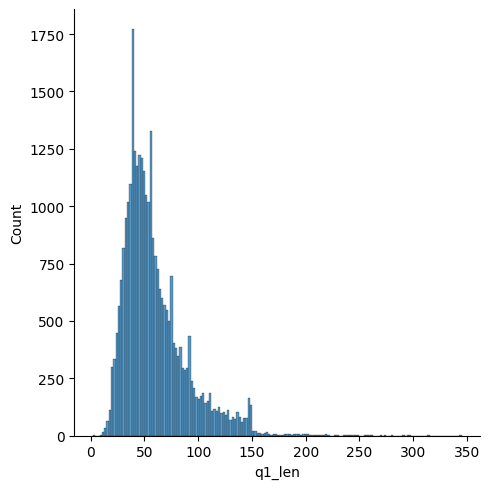

In [ ]:
sns.displot(new_df['q1_len'])
print('minimum characters',new_df['q1_len'].min())
print('maximum characters',new_df['q1_len'].max())
print('average num of characters',int(new_df['q1_len'].mean()))

minimum characters 10
maximum characters 1151
average num of characters 60


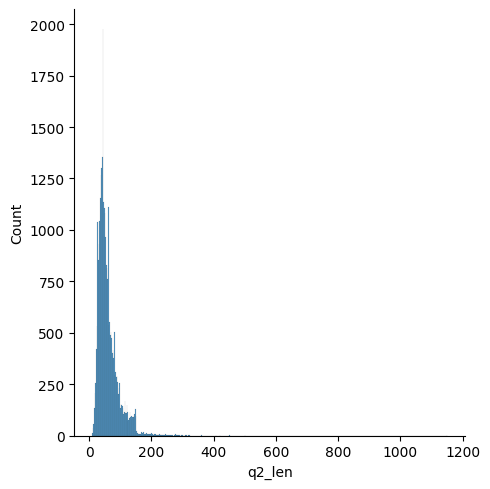

In [ ]:
sns.displot(new_df['q2_len'])
print('minimum characters',new_df['q2_len'].min())
print('maximum characters',new_df['q2_len'].max())
print('average num of characters',int(new_df['q2_len'].mean()))

minimum words 1
maximum words 61
average num of words 10


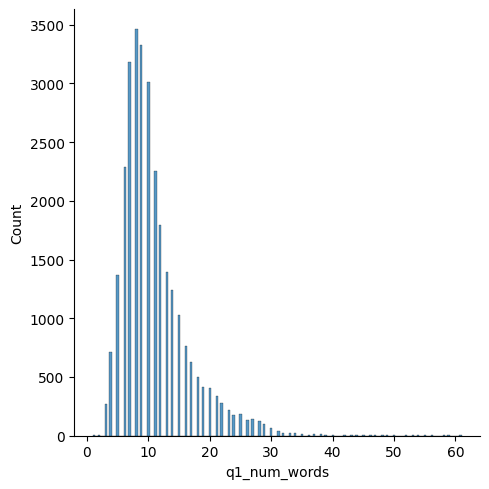

In [ ]:
sns.displot(new_df['q1_num_words'])
print('minimum words',new_df['q1_num_words'].min())
print('maximum words',new_df['q1_num_words'].max())
print('average num of words',int(new_df['q1_num_words'].mean()))

minimum words 2
maximum words 237
average num of words 11


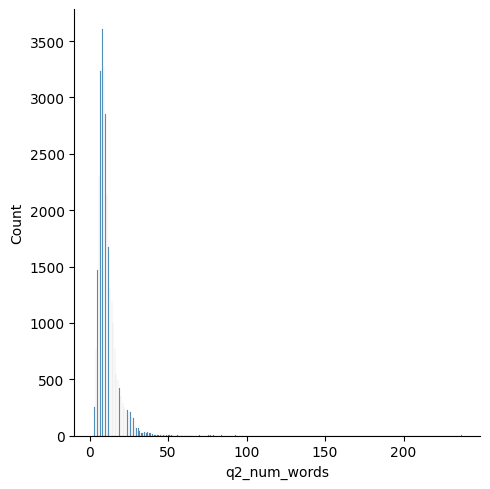

In [ ]:
sns.displot(new_df['q2_num_words'])
print('minimum words',new_df['q2_num_words'].min())
print('maximum words',new_df['q2_num_words'].max())
print('average num of words',int(new_df['q2_num_words'].mean()))

C:\Users\ARYAN\AppData\Local\Temp\ipykernel_1800\847226910.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df[new_df['is_duplicate'] == 0]['word_common'],label='non duplicate')
C:\Users\ARYAN\AppData\Local\Temp\ipykernel_1800\847226910.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(

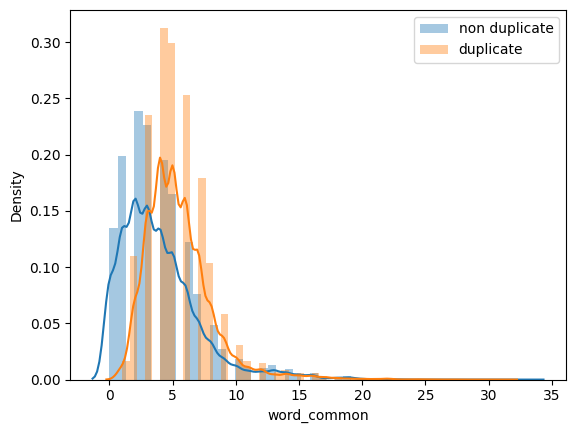

In [ ]:
sns.distplot(new_df[new_df['is_duplicate'] == 0]['word_common'],label='non duplicate')
sns.distplot(new_df[new_df['is_duplicate'] == 1]['word_common'],label='duplicate')
plt.legend()
plt.show()

C:\Users\ARYAN\AppData\Local\Temp\ipykernel_1800\590203201.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df[new_df['is_duplicate'] == 0]['word_total'],label='non duplicate')
C:\Users\ARYAN\AppData\Local\Temp\ipykernel_1800\590203201.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(n

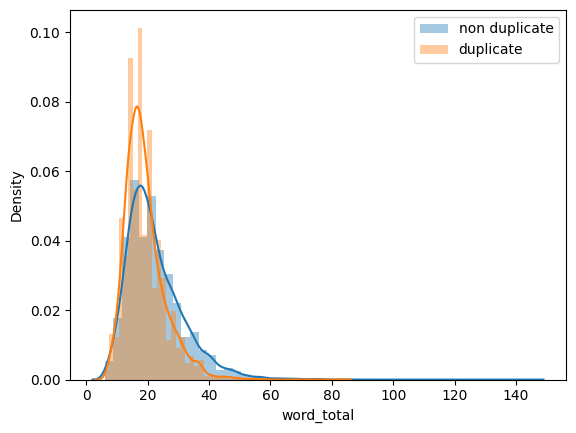

In [ ]:
sns.distplot(new_df[new_df['is_duplicate'] == 0]['word_total'],label='non duplicate')
sns.distplot(new_df[new_df['is_duplicate'] == 1]['word_total'],label='duplicate')
plt.legend()
plt.show()

C:\Users\ARYAN\AppData\Local\Temp\ipykernel_1800\2292000331.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df[new_df['is_duplicate'] == 0]['word_share'],label='non duplicate')
C:\Users\ARYAN\AppData\Local\Temp\ipykernel_1800\2292000331.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot

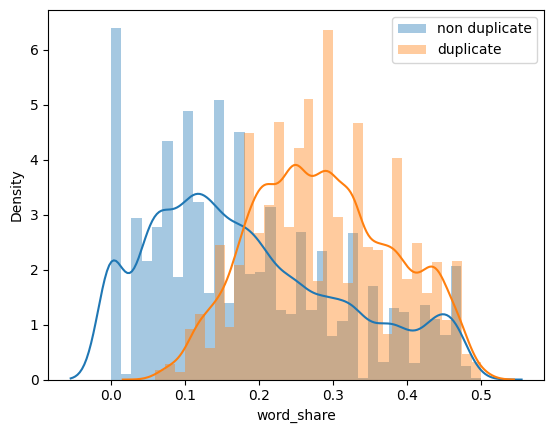

In [ ]:
sns.distplot(new_df[new_df['is_duplicate'] == 0]['word_share'],label='non duplicate')
sns.distplot(new_df[new_df['is_duplicate'] == 1]['word_share'],label='duplicate')
plt.legend()
plt.show()

In [ ]:
ques_df = new_df[['question1','question2']]
ques_df.head()

,question1,question2
197722,Will the Asian elephant die out in China if th...,What affect on the Asian elephant in China wil...
291825,What are Python .pyc files and how are they used?,I have a Python program which uses Oracle proc...
279721,How do presidential elections work in the US; ...,"How do presidential elections work in the US, ..."
260182,What is the most interesting and exciting coun...,What are the most powerful countries in the wo...
170408,How do I approach my parents about love?,How do I convince my parents for my love?


In [ ]:
final_df = new_df.drop(columns=['id','qid1','qid2','question1','question2'])
print(final_df.shape)
final_df.head()

(30000, 8)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
197722,1,62,92,12,16,6,26,0.23
291825,0,49,150,10,28,1,31,0.03
279721,0,106,106,18,18,9,23,0.39
260182,0,50,50,8,9,3,16,0.19
170408,0,40,41,8,9,6,16,0.38


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
# merge texts
questions = list(ques_df['question1']) + list(ques_df['question2'])

cv = CountVectorizer(max_features=3000)
q1_arr, q2_arr = np.vsplit(cv.fit_transform(questions).toarray(),2)

In [ ]:
temp_df1 = pd.DataFrame(q1_arr, index= ques_df.index)
temp_df2 = pd.DataFrame(q2_arr, index= ques_df.index)
temp_df = pd.concat([temp_df1, temp_df2], axis=1)
temp_df.shape


(30000, 6000)

In [ ]:
final_df = pd.concat([final_df, temp_df], axis=1)
print(final_df.shape)
final_df.head()

(30000, 6008)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share,0,1,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
197722,1,62,92,12,16,6,26,0.23,0,0,...,0,0,0,0,0,0,0,0,0,0
291825,0,49,150,10,28,1,31,0.03,0,0,...,0,0,0,0,0,0,0,0,0,0
279721,0,106,106,18,18,9,23,0.39,0,0,...,0,0,0,0,0,0,0,0,0,0
260182,0,50,50,8,9,3,16,0.19,0,0,...,0,0,0,0,0,0,0,0,0,0
170408,0,40,41,8,9,6,16,0.38,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(final_df.iloc[:,1:].values,final_df.iloc[:,0].values,test_size=0.2,random_state=1)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.7781666666666667

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)
accuracy_score(y_test,y_pred)

0.7715